# Analysis, Mining, and Visualization Techniques
## Diego Merino

It is increasingly common to see the integration of data science in the fields of law and justice.

A well-known example of this is the **COMPAS system** (*Correctional Offender Management Profiling for Alternative Sanctions*), which is used in several states in the United States of America to assess the risk of recidivism of detained individuals.

Una breve descripción del sistema puede verse en la página: **https//en.wikipedia.org/wiki/COMPAS_(software)**

In this case, a raw dataset is provided with information from the assessments (file **compas-scores.csv**) and the legal history of 11,000 cases in the years 2013 and 2014 (this is one of the original files used in an independent analysis of the COMPAS system carried out by **ProPublica**, available online).

Although the dataset contains additional information, to address the issues raised in this case, the following fields are necessary (in addition to some self-explanatory field names):

1. "**compas_screening_date**": refers to the date the assessment was conducted.

2. "**decile_score**": a number from 1 to 10 that indicates the general risk of recidivism (the higher the number, the higher the risk).

3. "**v_decile_score**": a number from 1 to 10, potentially different from the previous one, indicating the risk of recidivism in violent crimes. When evaluating a case in COMPAS, both scores are generated.

4. "**is_recid**": indicates whether the person is a repeat offender (within the data collection period: there is no information on whether the person reoffends beyond certain dates, and **IT IS IMPORTANT TO KEEP THIS IN MIND TO ENSURE HOMOGENEOUS COMPARISONS**).

5. "**r_offence_date**": the date the offense was committed for which the person is considered a repeat offender.

6. "**is_violent_recid**": indicates if the person is a repeat offender in a violent crime (the same considerations about dates that apply to "is_recid" apply here).

7. "**vr_offense_date**": the date the violent crime was committed that leads to the consideration of recidivism.

### I will load the data and perform an exploratory analysis and an evaluation of the data quality.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
COMPAS = pd.read_csv("./compas-scores.csv", index_col = "id")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
COMPAS.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


### I analyze how the variables sex, age and race are.

In [5]:
COMPAS.race.value_counts()

African-American    5813
Caucasian           4085
Hispanic            1100
Other                661
Asian                 58
Native American       40
Name: race, dtype: int64

Both “Asian” and “Native American” have few observations, so they are not representative, so I discard them.

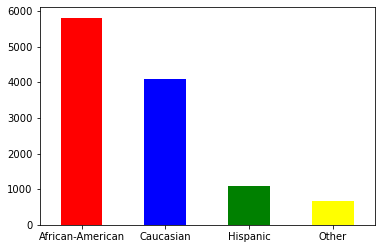

In [6]:
COMPAS_1 = COMPAS[COMPAS["race"].isin(["African-American", "Caucasian", "Hispanic", "Other"])]
COMPAS_1.race.value_counts().plot(kind = "bar", color = ["red","blue", "green", "yellow"])
plt.xticks(rotation = 0)
plt.show()

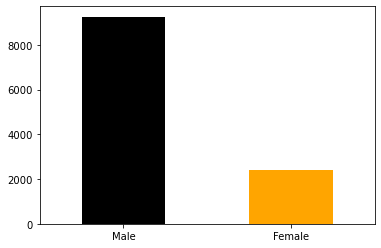

In [7]:
COMPAS_1.sex.value_counts().plot(kind = "bar", color = ["black", "orange"])
plt.xticks(rotation = 0)
plt.show()

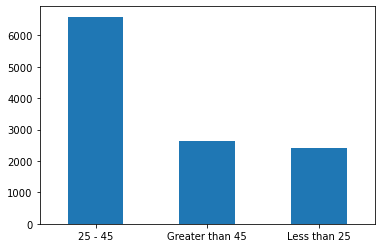

In [8]:
COMPAS_1.age_cat.value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()

### Breakdown of recidivism among the groups

In [9]:
RECID = COMPAS_1.groupby(["age_cat","sex","race"])["is_recid"].mean().unstack(level = "race")
RECID.sum(axis = 1)

age_cat          sex   
25 - 45          Female    0.566161
                 Male      0.945861
Greater than 45  Female    0.102586
                 Male      0.538284
Less than 25     Female    0.705711
                 Male      1.384469
dtype: float64

In [10]:
RECID = COMPAS_1.groupby(["age_cat","sex","race"])["is_recid"].mean().unstack(level = "race")
RECID

race                    African-American  Caucasian  Hispanic     Other
age_cat         sex                                                    
25 - 45         Female          0.197368   0.219557  0.082569  0.066667
                Male            0.360354   0.230955  0.151803  0.202749
Greater than 45 Female          0.067114   0.094737  0.069767 -0.129032
                Male            0.236230   0.131063  0.065728  0.105263
Less than 25    Female          0.279152   0.184397  0.162162  0.080000
                Male            0.401372   0.285425  0.339181  0.358491

In [11]:
RECID.to_excel("RECID_2.xlsx", index = True)

Each individual is assigned a **decile_score** (range 1 to 10), which represents the risk of recidivism.

In [12]:
COMPAS_1.decile_score.value_counts()

 1     2546
 2     1556
 3     1245
 4     1193
 5     1028
 6      985
 7      894
 9      800
 8      792
 10     605
-1       15
Name: decile_score, dtype: int64

The value **“-1”** does not fit the data description. Let's have a look at the entries where this value appears.

In [13]:
COMPAS_1[COMPAS_1["decile_score"].isin([-1])]

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29,jeremiah joseph,jeremiah,joseph,2014-10-16,Male,1991-08-29,24,Less than 25,African-American,0,-1,0,0,2,0.0,2014-10-16 02:13:30,2014-10-17 03:38:48,14013974CF10A,2014-10-16,NaN,0.0,F,Poss Pyrrolidinovalerophenone,1,NaN,15000162MM30A,M,NaN,2015-01-12,Petit Theft,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2014-10-16,Risk of Recidivism,-1,NaN,2014-10-16
529,karen devonow,karen,devonow,2013-11-25,Female,1955-11-26,60,Greater than 45,Caucasian,0,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-11-25,Risk of Recidivism,-1,NaN,2013-11-25
759,robert cortez,robert,cortez,2013-05-13,Male,1989-03-30,27,25 - 45,Caucasian,0,-1,0,0,1,102.0,2013-08-23 09:11:34,2014-01-07 02:22:59,12000292CF10A,2012-01-06,NaN,493.0,M,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-05-13,Risk of Recidivism,-1,NaN,2013-05-13
902,michael rohrs,michael,rohrs,2013-04-11,Male,1968-02-06,48,Greater than 45,Caucasian,0,-1,0,0,3,-1.0,2013-04-10 05:39:46,2013-04-12 09:08:49,13005170CF10A,2013-04-10,NaN,1.0,F,Possession of Cocaine,1,NaN,14003620CF10A,F,0.0,2014-03-14,Traffick Methampheta 28g><200g,2014-03-14,2014-04-21,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-11,Risk of Recidivism,-1,NaN,2013-04-11
3028,deborah conroy,deborah,conroy,2013-05-07,Female,1962-09-05,53,Greater than 45,Caucasian,0,-1,0,0,0,0.0,2013-05-07 02:21:39,2013-05-07 07:20:14,13008854MM10A,2013-05-06,NaN,1.0,M,DUI Property Damage/Injury,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-05-07,Risk of Recidivism,-1,NaN,2013-05-07
3708,katt mcnish,katt,mcnish,2013-05-12,Female,1976-05-14,39,25 - 45,Caucasian,0,-1,0,0,0,-1.0,2013-05-11 05:10:47,2013-05-12 05:55:20,13009096MM10A,2013-05-11,NaN,1.0,M,Driving Under The Influence,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-05-12,Risk of Recidivism,-1,NaN,2013-05-12
4995,raymond manganiotis,raymond,manganiotis,2013-06-21,Male,1963-01-25,53,Greater than 45,Caucasian,0,-1,0,0,3,-10.0,2013-06-11 02:07:31,2013-06-21 05:30:17,13008275CF10A,2013-06-10,NaN,11.0,F,Possession of Cocaine,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,4,Low,2013-06-21,Risk of Recidivism,-1,NaN,2013-06-21
6283,carla silva,carla,silva,2013-09-23,Female,1954-03-01,62,Greater than 45,Other,0,-1,0,0,1,-2.0,2013-09-21 10:16:36,2013-09-22 01:50:26,13013329CF10A,2013-09-21,NaN,2.0,F,Possession of Cocaine,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-09-23,Risk of Recidivism,-1,NaN,2013-09-23
7132,clee farr,clee,farr,2013-02-08,Male,1955-12-22,60,Greater than 45,Caucasian,0,-1,0,0,0,-1.0,2013-02-07 09:00:40,2013-02-08 08:10:45,13001918CF10A,2013-02-07,NaN,1.0,F,Manufacture Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,5,Medium,2013-02-08,Risk of Recidivism,-1,NaN,2013-02-08


I understand that this may be an error when entering the entries, so we will treat **“-1”** as a **“1”**.

In [14]:
COMPAS_1.loc[COMPAS_1["decile_score"] == 1, "decile_score"] = 1

<AxesSubplot:>

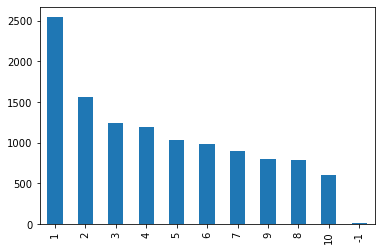

In [15]:
COMPAS_1.decile_score.value_counts().plot(kind = "bar")

In [16]:
COMPAS_DECILE = COMPAS_1.groupby(["race","decile_score"]).name.count().reset_index()
COMPAS_DECILE

,race,decile_score,name
0,African-American,-1,6
1,African-American,1,694
2,African-American,2,623
3,African-American,3,573
4,African-American,4,589
5,African-American,5,525
6,African-American,6,585
7,African-American,7,595
8,African-American,8,566
9,African-American,9,587


In [17]:
COMPAS_RES = COMPAS_DECILE.pivot(columns = "decile_score", index = "race", values = "name")
COMPAS_RES

decile_score,-1,1,2,3,4,5,6,7,8,9,10
race,,,,,,,,,,,
African-American,6.0,694.0,623.0,573.0,589.0,525.0,585.0,595.0,566.0,587.0,470.0
Caucasian,8.0,1192.0,610.0,480.0,450.0,380.0,301.0,228.0,179.0,166.0,91.0
Hispanic,NaN,376.0,203.0,135.0,84.0,85.0,64.0,50.0,34.0,37.0,32.0
Other,1.0,284.0,120.0,57.0,70.0,38.0,35.0,21.0,13.0,10.0,12.0


In [18]:
COMPAS_RES = COMPAS_RES.melt(ignore_index = False)

In [19]:
COMPAS_RES.keys()

Index(['decile_score', 'value'], dtype='object')

In [20]:
COMPAS_RES.index

Index(['African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other'],
      dtype='object', name='race')

In [ ]:
COMPAS_RES

In [21]:
COMPAS_RES = COMPAS_RES.reset_index()
COMPAS_RES.head()

,race,decile_score,value
0,African-American,-1,6.0
1,Caucasian,-1,8.0
2,Hispanic,-1,NaN
3,Other,-1,1.0
4,African-American,1,694.0


In [22]:
COMPAS_RES['media']= COMPAS_RES.groupby('race', group_keys = False).value.apply(lambda x: x/x.sum())

In [23]:
COMPAS_RES.groupby("race").media.sum()

race
African-American    1.0
Caucasian           1.0
Hispanic            1.0
Other               1.0
Name: media, dtype: float64

### I graphically represent the number of observations per ethnic group.

In [24]:
import seaborn as sns

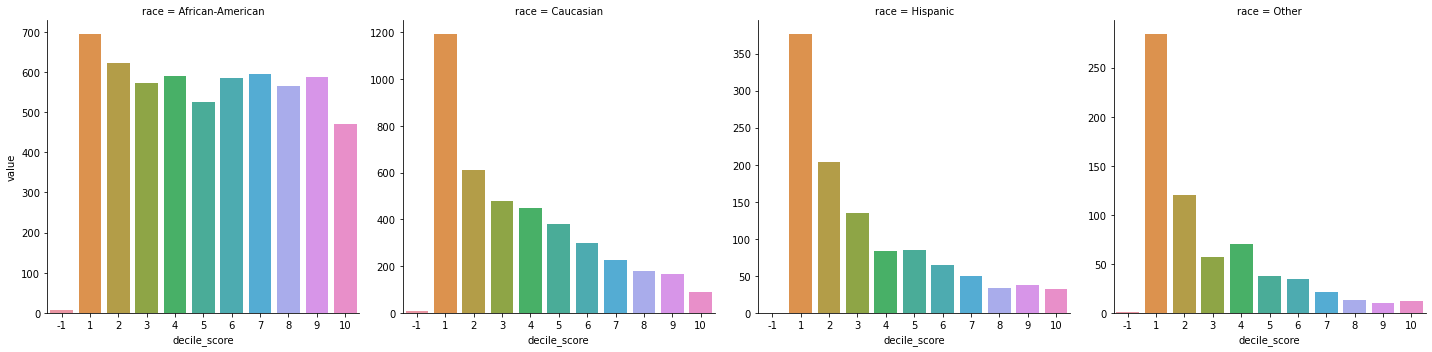

In [25]:
sns.catplot(x = "decile_score", y = "value", col = "race", data = COMPAS_RES, kind = "bar", sharey = False)

### I explore whether the “is_recid” and “is_violent_recid” fields in this dataset are suitable for assessing the accuracy of the risk estimates generated by the COMPAS system.

<AxesSubplot:xlabel='decile_score', ylabel='is_recid'>

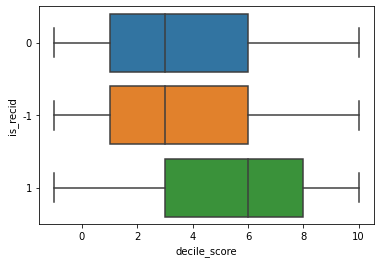

In [26]:
sns.boxplot(x=COMPAS_1.decile_score, y=COMPAS_1.is_recid.astype(str))

<AxesSubplot:xlabel='decile_score', ylabel='is_violent_recid'>

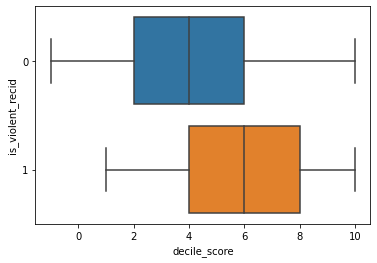

In [27]:
sns.boxplot(x=COMPAS_1.decile_score, y=COMPAS_1.is_violent_recid.astype(str))

In [28]:
COMPAS_RES = COMPAS_1.groupby(["is_recid", "decile_score"]).size().reset_index(name = "Freq")

<AxesSubplot:xlabel='decile_score', ylabel='Freq'>

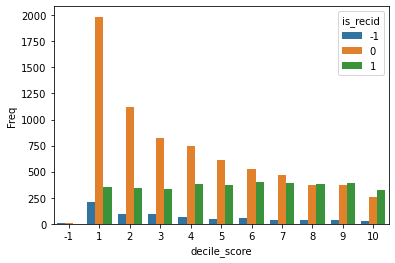

In [29]:
sns.barplot(x="decile_score", hue = "is_recid", y = "Freq", data = COMPAS_RES)

In [30]:
COMPAS_RES = COMPAS_1.groupby(["is_violent_recid", "decile_score"]).size().reset_index(name="Freq")

<AxesSubplot:xlabel='decile_score', ylabel='Freq'>

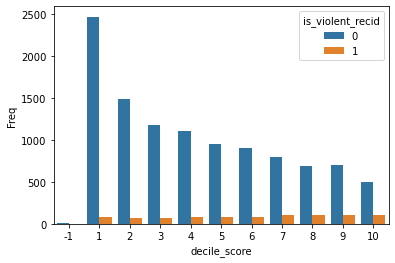

In [31]:
sns.barplot(x="decile_score", hue="is_violent_recid",y="Freq",data=COMPAS_RES)

In [32]:
COMPAS_1["decile_score"]

id
1        1
2        5
3        3
4        4
5        8
        ..
11752    1
11753    3
11754    7
11755    4
11756    3
Name: decile_score, Length: 11659, dtype: int64

In [33]:
COMPAS_1[["is_recid", "is_violent_recid"]]

,is_recid,is_violent_recid
id,,
1,0,0
2,-1,0
3,1,1
4,1,0
5,0,0
...,...,...
11752,1,0
11753,0,0
11754,1,0


I use **pd.get_dummies** to convert the race and sex variables to numerical, since we are going to include them in the model.

In [34]:
COMPAS_1 = pd.get_dummies(data=COMPAS_1, columns=["sex"], drop_first=True)

In [35]:
COMPAS_1 = pd.get_dummies(data=COMPAS_1, columns=["race"])

In [36]:
COMPAS_1

,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14,1,0,0,0,1
2,michael ryan,michael,ryan,2014-12-31,1985-02-06,31,25 - 45,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31,1,0,1,0,0
3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27,1,1,0,0,0
4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14,1,1,0,0,0
5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,rodrick phillips,rodrick,phillips,2013-02-27,1953-02-24,63,Greater than 45,0,1,0,0,5,-2.0,2013-02-25 09:20:49,2013-02-26 01:21:51,13003941MM10A,2013-02-25,NaN,2.0,M,Driving Under The Influence,1,NaN,13004477CF10A,M,1.0,2013-03-27,Violation License Restrictions,2013-03-28,2013-05-07,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-02-27,Risk of Recidivism,1,Low,2013-02-27,1,1,0,0,0
11753,patrick hamilton,patrick,hamilton,2013-09-22,1968-05-02,47,Greater than 45,0,3,0,0,1,-1.0,2013-09-21 04:06:00,2013-09-22 08:16:13,13013317CF10A,2013-09-21,NaN,1.0,F,Burglary Structure Unoccup,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-09-22,Risk of Recidivism,3,Low,2013-09-22,1,0,0,0,1
11754,raymond hernandez,raymond,hernandez,2013-05-17,1993-06-24,22,Less than 25,0,7,3,5,3,-1.0,2013-05-16 08:58:35,2013-05-18 07:59:30,13009569MM10A,2013-05-16,NaN,1.0,M,Battery,1,NaN,14086081TC30A,M,NaN,2014-10-11,Driving License Suspended,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,5,Medium,2013-05-17,Risk of Recidivism,7,Medium,2013-05-17,1,0,1,0,0


In [37]:
COMPAS_1[["is_recid", "is_violent_recid"]]

,is_recid,is_violent_recid
id,,
1,0,0
2,-1,0
3,1,1
4,1,0
5,0,0
...,...,...
11752,1,0
11753,0,0
11754,1,0


#### Analysis of the target variable “is_recid ”

In [38]:
COMPAS_1.head()

,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14,1,0,0,0,1
2,michael ryan,michael,ryan,2014-12-31,1985-02-06,31,25 - 45,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31,1,0,1,0,0
3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27,1,1,0,0,0
4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14,1,1,0,0,0
5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13,1,1,0,0,0


In [39]:
COMPAS_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11659 entries, 1 to 11756
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     11659 non-null  object 
 1   first                    11659 non-null  object 
 2   last                     11659 non-null  object 
 3   compas_screening_date    11659 non-null  object 
 4   dob                      11659 non-null  object 
 5   age                      11659 non-null  int64  
 6   age_cat                  11659 non-null  object 
 7   juv_fel_count            11659 non-null  int64  
 8   decile_score             11659 non-null  int64  
 9   juv_misd_count           11659 non-null  int64  
 10  juv_other_count          11659 non-null  int64  
 11  priors_count             11659 non-null  int64  
 12  days_b_screening_arrest  10491 non-null  float64
 13  c_jail_in                10491 non-null  object 
 14  c_jail_out            

I convert 'compas_screening_date', 'c_jail_out', 'r_offense_date' and 'vr_offense_date' to datetime and then create a new column showing the time elapsed since the person's release and recidivism.

In [40]:
COMPAS_1["compas_screening_date"]= pd.to_datetime(COMPAS_1["compas_screening_date"])

In [41]:
COMPAS_1["c_jail_out"]=pd.to_datetime(COMPAS_1["c_jail_out"])

In [42]:
COMPAS_1["r_offense_date"]=pd.to_datetime(COMPAS_1["r_offense_date"])

In [43]:
COMPAS_1["vr_offense_date"]=pd.to_datetime(COMPAS_1["vr_offense_date"])

In [44]:
COMPAS_1["from_out_to_recid"]= (COMPAS_1["r_offense_date"]-COMPAS_1["c_jail_out"])

In [45]:
COMPAS_1["from_COMPAS_to_recid"]= (COMPAS_1["r_offense_date"]-COMPAS_1["compas_screening_date"])

In [46]:
COMPAS_1["from_COMPAS_to_out"]=(COMPAS_1["from_COMPAS_to_recid"]-COMPAS_1["from_out_to_recid"])

#### Selection of the variables to be used

In [47]:
COMPAS_2=COMPAS_1.loc[:, ["name", "first", "last", "age", "age_cat", "decile_score",
                         "v_decile_score", "c_jail_in", "c_jail_out", "is_recid", "is_violent_recid",
                         "compas_screening_date", "r_offense_date","vr_offense_date",
                         "from_out_to_recid", "from_COMPAS_to_recid", "from_COMPAS_to_out",
                         "sex_Male", "race_African-American", "race_Caucasian", "race_Hispanic", "race_Other"]]

In [48]:
COMPAS_2.head()

,name,first,last,age,age_cat,decile_score,v_decile_score,c_jail_in,c_jail_out,is_recid,is_violent_recid,compas_screening_date,r_offense_date,vr_offense_date,from_out_to_recid,from_COMPAS_to_recid,from_COMPAS_to_out,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other
id,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,69,Greater than 45,1,1,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,2013-08-14,NaT,NaT,NaT,NaT,NaT,1,0,0,0,1
2,michael ryan,michael,ryan,31,25 - 45,5,2,NaN,NaT,-1,0,2014-12-31,NaT,NaT,NaT,NaT,NaT,1,0,1,0,0
3,kevon dixon,kevon,dixon,34,25 - 45,3,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,1,2013-01-27,2013-07-05,2013-07-05,149 days 18:23:07,159 days,9 days 05:36:53,1,1,0,0,0
4,ed philo,ed,philo,24,Less than 25,4,3,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,2013-04-14,2013-06-16,NaT,62 days 16:57:56,63 days,0 days 07:02:04,1,1,0,0,0
5,marcu brown,marcu,brown,23,Less than 25,8,6,NaN,NaT,0,0,2013-01-13,NaT,NaT,NaT,NaT,NaT,1,1,0,0,0


In [49]:
COMPAS_2=COMPAS_2[COMPAS_2.is_recid.isin([0,1])]

In [50]:
COMPAS_2.head()

,name,first,last,age,age_cat,decile_score,v_decile_score,c_jail_in,c_jail_out,is_recid,is_violent_recid,compas_screening_date,r_offense_date,vr_offense_date,from_out_to_recid,from_COMPAS_to_recid,from_COMPAS_to_out,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other
id,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,69,Greater than 45,1,1,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,2013-08-14,NaT,NaT,NaT,NaT,NaT,1,0,0,0,1
3,kevon dixon,kevon,dixon,34,25 - 45,3,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,1,2013-01-27,2013-07-05,2013-07-05,149 days 18:23:07,159 days,9 days 05:36:53,1,1,0,0,0
4,ed philo,ed,philo,24,Less than 25,4,3,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,2013-04-14,2013-06-16,NaT,62 days 16:57:56,63 days,0 days 07:02:04,1,1,0,0,0
5,marcu brown,marcu,brown,23,Less than 25,8,6,NaN,NaT,0,0,2013-01-13,NaT,NaT,NaT,NaT,NaT,1,1,0,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,43,25 - 45,1,1,NaN,NaT,0,0,2013-03-26,NaT,NaT,NaT,NaT,NaT,1,0,0,0,1


In [51]:
COMPAS_2.is_recid.value_counts()

0    7270
1    3679
Name: is_recid, dtype: int64

In [52]:
COMPAS_2["more_than_a_year_recid"]=COMPAS_2["from_out_to_recid"]>"365 days"

In [53]:
COMPAS_2["more_than_a_year_recid"].value_counts()

False    9925
True     1024
Name: more_than_a_year_recid, dtype: int64

In [54]:
COMPAS_2["more_than_a_year_recid"]=COMPAS_2["more_than_a_year_recid"].astype(int)

In [55]:
COMPAS_2["more_than_a_year_recid"].value_counts()

0    9925
1    1024
Name: more_than_a_year_recid, dtype: int64

#### I select all the cases in which there has been a recidivism

In [56]:
COMPAS_RECID_1=COMPAS_2[COMPAS_2.is_recid.isin([1])]

In [57]:
COMPAS_RECID_1.head()

,name,first,last,age,age_cat,decile_score,v_decile_score,c_jail_in,c_jail_out,is_recid,is_violent_recid,compas_screening_date,r_offense_date,vr_offense_date,from_out_to_recid,from_COMPAS_to_recid,from_COMPAS_to_out,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other,more_than_a_year_recid
id,,,,,,,,,,,,,,,,,,,,,,,
3,kevon dixon,kevon,dixon,34,25 - 45,3,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,1,2013-01-27,2013-07-05,2013-07-05,149 days 18:23:07,159 days,9 days 05:36:53,1,1,0,0,0,0
4,ed philo,ed,philo,24,Less than 25,4,3,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,2013-04-14,2013-06-16,NaT,62 days 16:57:56,63 days,0 days 07:02:04,1,1,0,0,0,0
8,edward riddle,edward,riddle,41,25 - 45,6,2,2014-02-18 05:08:24,2014-02-24 12:18:30,1,0,2014-02-19,2014-03-31,NaT,34 days 11:41:30,40 days,5 days 12:18:30,1,0,1,0,0,0
13,bo bradac,bo,bradac,21,Less than 25,3,5,2015-01-06 03:55:34,2015-01-07 03:38:44,1,1,2013-11-04,2015-01-06,2015-01-06,-2 days +20:21:16,428 days,429 days 03:38:44,1,0,1,0,0,0
15,ellyaher lanza,ellyaher,lanza,23,Less than 25,6,4,2013-10-03 04:07:35,2013-10-07 08:17:30,1,0,2013-10-03,2014-02-08,NaT,123 days 15:42:30,128 days,4 days 08:17:30,1,1,0,0,0,0


In [58]:
COMPAS_RES = COMPAS_2.groupby(["is_recid", "is_violent_recid"]).size().reset_index(name="Freq")

In [59]:
COMPAS_RES.head()

,is_recid,is_violent_recid,Freq
0,0,0,7270
1,1,0,2807
2,1,1,872


<AxesSubplot:xlabel='is_recid', ylabel='Freq'>

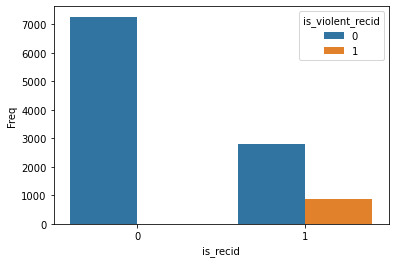

In [60]:
sns.barplot(x="is_recid", hue="is_violent_recid", y="Freq", data=COMPAS_RES)

- 7270 subjects out of a total of 10899, i.e. 66.7% of the sample did not reoffend.
- 2807 subjects, i.e., 25.75% of the sample recidivated, but not violently.
- 872 subjects, i.e. 7.55% of the sample relapsed and violently.

In [61]:
COMPAS_RECID_2 = COMPAS_RECID_1.groupby(["is_recid", "more_than_a_year_recid"]).size().reset_index(name="Freq")

<AxesSubplot:xlabel='is_recid', ylabel='Freq'>

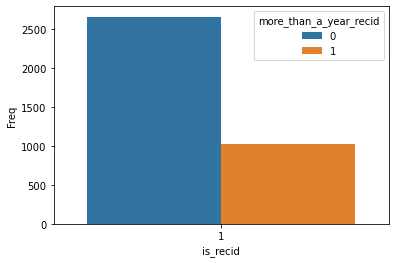

In [62]:
sns.barplot(x="is_recid", hue="more_than_a_year_recid", y = "Freq", data = COMPAS_RECID_2)

In [63]:
COMPAS_RECID_2.head()

,is_recid,more_than_a_year_recid,Freq
0,1,0,2655
1,1,1,1024


- 2655 of the total 3679 recidivists did not recidivate during the first year, or 72%.
- 1,024 of the total 3,679 recidivists recidivated during the first year, or 28%.

#### We applied the LogistcRegression model to evaluate the accuracy with respect to “is_recid”, “is_violent_recid”.

In [64]:
X = COMPAS_2[["age", "decile_score", "more_than_a_year_recid", 
              "sex_Male","race_African-American", "race_Caucasian", "race_Hispanic", "race_Other"]]
Y = COMPAS_2["is_recid"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.33, random_state = 42)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression (max_iter=1000)

In [69]:
model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [70]:
import warnings

In [75]:
warnings.filterwarnings("ignore")

In [76]:
Y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import plot_confusion_matrix, classification_report

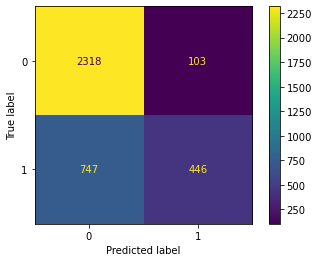

In [78]:
plot_confusion_matrix (estimator = model, X = X_test, y_true = Y_test)

In [79]:
reportlr = classification_report(y_true = Y_test, y_pred = model.predict(X_test))

In [80]:
print(reportlr)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2421
           1       0.81      0.37      0.51      1193

    accuracy                           0.76      3614
   macro avg       0.78      0.67      0.68      3614
weighted avg       0.77      0.76      0.74      3614



### I balance the data since there is a noticeable difference of is_recid = 1 with respect to is_recid = 0.

In [81]:
COMPAS_2.is_recid.value_counts(normalize = True)

0    0.663988
1    0.336012
Name: is_recid, dtype: float64

In [82]:
pip install -U imbalanced-learn

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (random_state = 42)
X_sm, y_sm = sm.fit_resample(X,Y)

In [84]:
X_train.shape

(7335, 8)

In [85]:
X_sm.shape

(14540, 8)

In [86]:
y_sm.value_counts(normalize = True)*100

0    50.0
1    50.0
Name: is_recid, dtype: float64

### I apply the LogisticRegression model again.

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 42)

In [89]:
modelsm = LogisticRegression(max_iter = 1000)

In [90]:
modelsm.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [91]:
y_pred = modelsm.predict(X_test)

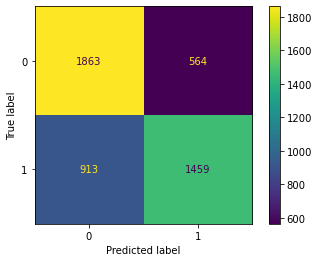

In [92]:
plot_confusion_matrix(estimator=modelsm, X= X_test, y_true = Y_test)

In [93]:
reportlrsm = classification_report (y_true = Y_test, y_pred = modelsm.predict(X_test))

In [94]:
print(reportlrsm)

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2427
           1       0.72      0.62      0.66      2372

    accuracy                           0.69      4799
   macro avg       0.70      0.69      0.69      4799
weighted avg       0.70      0.69      0.69      4799



### Study of the target variable “is_violent_recid”.

In [95]:
X = COMPAS_2[["age","v_decile_score","more_than_a_year_recid",
              "sex_Male","race_African-American","race_Caucasian","race_Hispanic",
             "race_Other"]]
y = COMPAS_2["is_violent_recid"]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.33, random_state = 42)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression (max_iter = 1000)

In [100]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [101]:
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import plot_confusion_matrix, classification_report

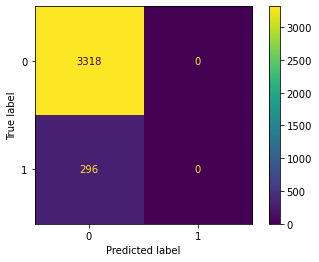

In [103]:
plot_confusion_matrix(estimator = model, X=X_test, y_true = y_test)

In [104]:
reportlr = classification_report (y_true = y_test, y_pred = model.predict(X_test))

In [105]:
print(reportlr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3318
           1       0.00      0.00      0.00       296

    accuracy                           0.92      3614
   macro avg       0.46      0.50      0.48      3614
weighted avg       0.84      0.92      0.88      3614



### I balance the data

In [106]:
COMPAS_1.is_violent_recid.value_counts(normalize=True)

0    0.925208
1    0.074792
Name: is_violent_recid, dtype: float64

In [107]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

In [108]:
X_train.shape

(7335, 8)

In [109]:
X_sm.shape

(20154, 8)

In [110]:
y_sm.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: is_violent_recid, dtype: float64

### I apply the Logistic Regression model again.

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 42)

In [113]:
modelsm = LogisticRegression(max_iter = 1000)

In [114]:
modelsm.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [115]:
y_ored = modelsm.predict(X_test)

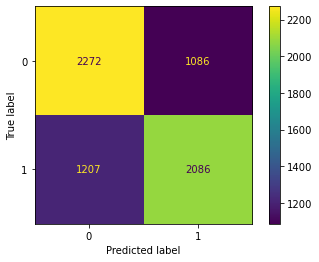

In [116]:
plot_confusion_matrix(estimator=modelsm, X=X_test, y_true = y_test)

In [117]:
reportlrsm = classification_report(y_true = y_test, y_pred = modelsm.predict(X_test))

In [118]:
print(reportlrsm)

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      3358
           1       0.66      0.63      0.65      3293

    accuracy                           0.66      6651
   macro avg       0.66      0.66      0.65      6651
weighted avg       0.66      0.66      0.66      6651



### The threshold for establishing recidivism preventive measures that I will use is 7 and above.

Given this threshold, I generate a contigency table, explaining which case is considered as “positive” and, therefore, which are type I errors and type II errors.

#### Comparison and visualization of the relationship between having taken preventive measures and recidivism during the first year.

In [119]:
COMPAS_RECID_1["decile_score"] >= 7

id
3        False
4        False
8        False
13       False
15       False
         ...  
11739    False
11744    False
11747    False
11752    False
11754     True
Name: decile_score, Length: 3679, dtype: bool

In [120]:
import numpy as np

In [121]:
COMPAS_RECID_1 = COMPAS_RECID_1.copy()
COMPAS_RECID_1.loc[:, "Medidas_prev"] = np.where(COMPAS_RECID_1["decile_score"] >= 7, 1, 0)

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
COMPAS_RECID_1=pd.get_dummies(COMPAS_RECID_1, columns=['Medidas_prev'], drop_first=True)

In [124]:
COMPAS_RECID_1.head()

,name,first,last,age,age_cat,decile_score,v_decile_score,c_jail_in,c_jail_out,is_recid,is_violent_recid,compas_screening_date,r_offense_date,vr_offense_date,from_out_to_recid,from_COMPAS_to_recid,from_COMPAS_to_out,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other,more_than_a_year_recid,Medidas_prev_1
id,,,,,,,,,,,,,,,,,,,,,,,,
3,kevon dixon,kevon,dixon,34,25 - 45,3,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,1,2013-01-27,2013-07-05,2013-07-05,149 days 18:23:07,159 days,9 days 05:36:53,1,1,0,0,0,0,0
4,ed philo,ed,philo,24,Less than 25,4,3,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,2013-04-14,2013-06-16,NaT,62 days 16:57:56,63 days,0 days 07:02:04,1,1,0,0,0,0,0
8,edward riddle,edward,riddle,41,25 - 45,6,2,2014-02-18 05:08:24,2014-02-24 12:18:30,1,0,2014-02-19,2014-03-31,NaT,34 days 11:41:30,40 days,5 days 12:18:30,1,0,1,0,0,0,0
13,bo bradac,bo,bradac,21,Less than 25,3,5,2015-01-06 03:55:34,2015-01-07 03:38:44,1,1,2013-11-04,2015-01-06,2015-01-06,-2 days +20:21:16,428 days,429 days 03:38:44,1,0,1,0,0,0,0
15,ellyaher lanza,ellyaher,lanza,23,Less than 25,6,4,2013-10-03 04:07:35,2013-10-07 08:17:30,1,0,2013-10-03,2014-02-08,NaT,123 days 15:42:30,128 days,4 days 08:17:30,1,1,0,0,0,0,0


In [125]:
COMPAS_RES_3=COMPAS_RECID_1.groupby(['more_than_a_year_recid', 'Medidas_prev_1']).size().reset_index(name='Freq')

In [126]:
COMPAS_RES_3

,more_than_a_year_recid,Medidas_prev_1,Freq
0,0,0,1516
1,0,1,1139
2,1,0,673
3,1,1,351


<AxesSubplot:xlabel='more_than_a_year_recid', ylabel='Freq'>

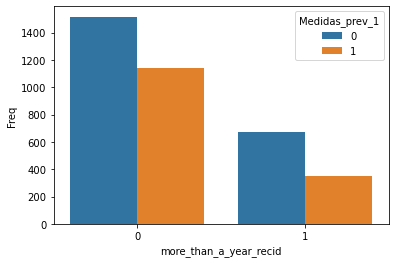

In [127]:
sns.barplot(x='more_than_a_year_recid', y= 'Freq', hue='Medidas_prev_1', data= COMPAS_RES_3)

- We see that the highest number of observations is where NO preventive measures were taken (decile score >7) and the person relapsed in less than one year (41%).
- This is followed closely (31%) by the case where preventive measures were taken and the person relapsed in less than one year.

The system assigns, on average, higher risk assessments to men than to women, and to African Americans than to Caucasians. However, recidivism rates are also higher for these groups, although it is not clear whether the risk assignment is “fair” or not. Show these differences through graphical representations and use them to analyze whether or not the assignment of assessments is fair.